## 1- Time Series Example

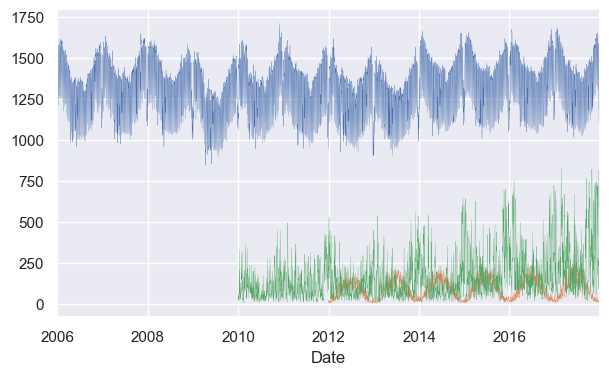

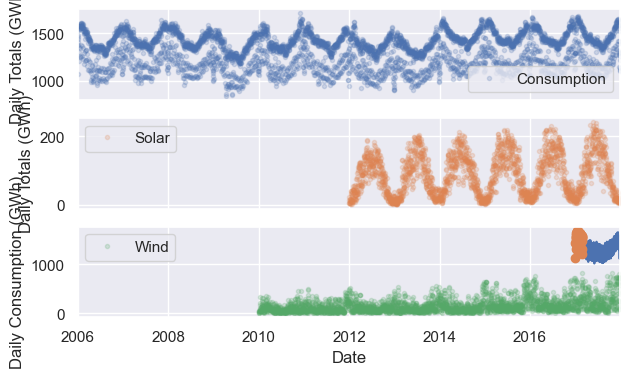

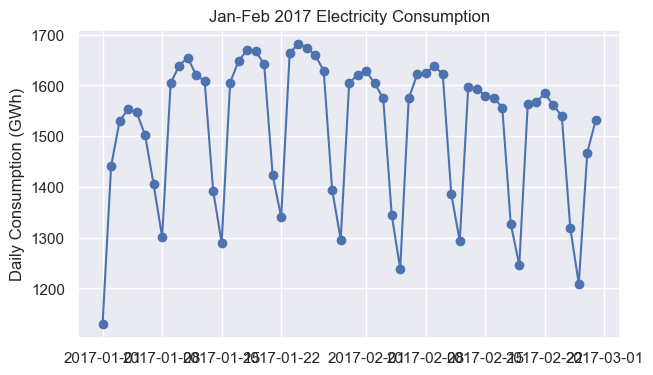

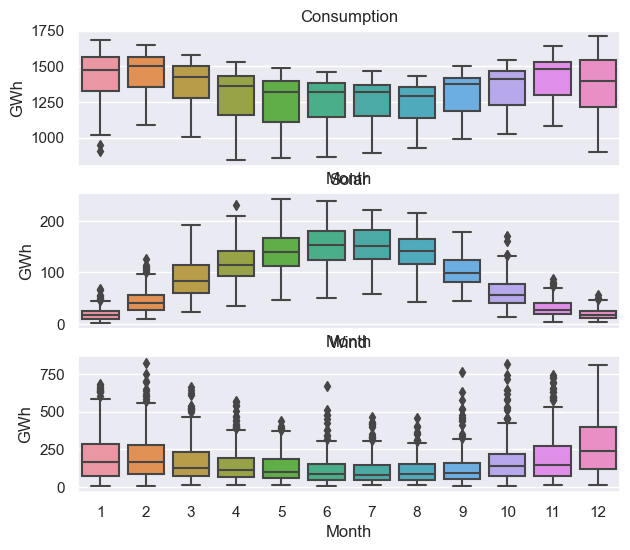

In [4]:
import pandas as pd
pd.to_datetime('2018-01-15 3:45pm')
pd.to_datetime('7/8/1952')
pd.to_datetime('7/8/1952', dayfirst=True)
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')
opsd_daily = pd.read_csv('D:\\AI\\10 القسم العاشر  مكتبة سايكيتليرن Sklearn Library\\Materials\Data\\4 Time Series\\opsd_germany_daily.csv')
opsd_daily.shape
opsd_daily.head(3)
opsd_daily.tail(3)
opsd_daily.dtypes
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)
opsd_daily.index
opsd_daily = pd.read_csv('D:\\AI\\10 القسم العاشر  مكتبة سايكيتليرن Sklearn Library\\Materials\Data\\4 Time Series\\opsd_germany_daily.csv', index_col=0,parse_dates=True)
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
#opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)
opsd_daily.loc['2017-08-10']
opsd_daily.loc['2014-01-20':'2014-01-22']
opsd_daily.loc['2012-02']
#=======================================================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(7, 4)})
opsd_daily['Consumption'].plot(linewidth=0.2);
opsd_daily['Solar'].plot(linewidth=0.2);
opsd_daily['Wind'].plot(linewidth=0.2);
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.2, linestyle='None', figsize=(7,4), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');
#============================================================
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
#============================================================
fig, axes = plt.subplots(3, 1, figsize=(7, 6), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
#============================================================
#sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

## 2 - Example Two

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


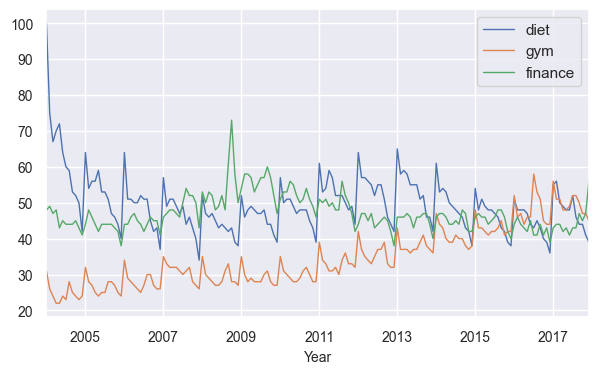

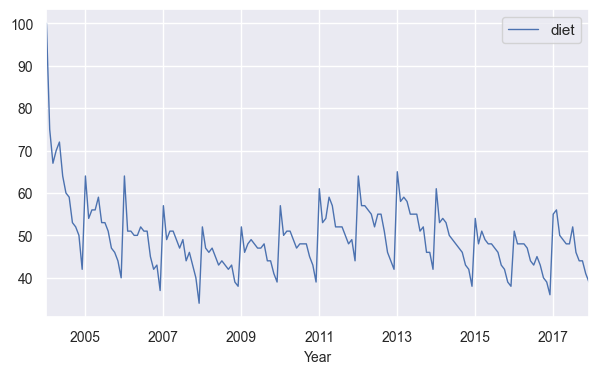

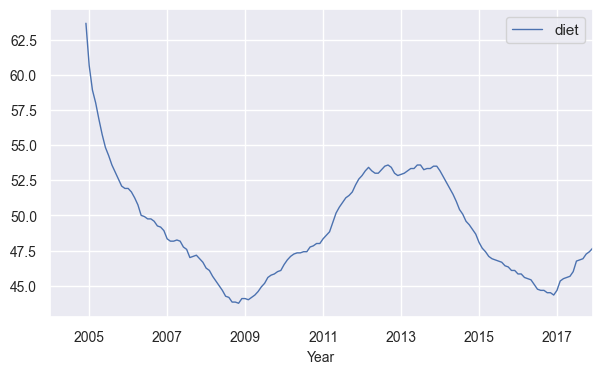

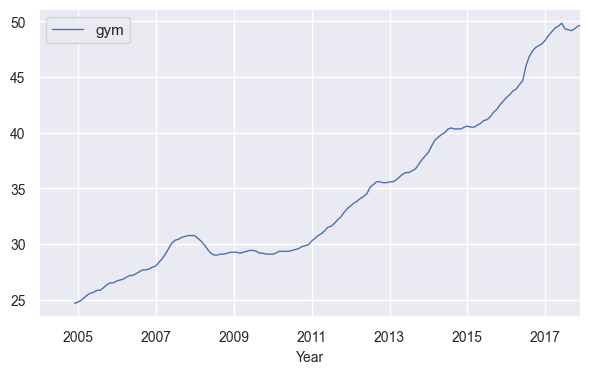

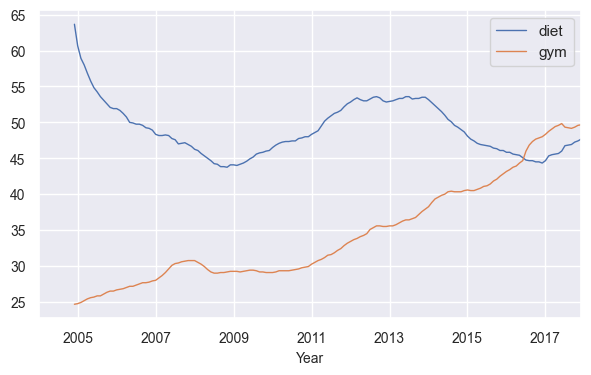

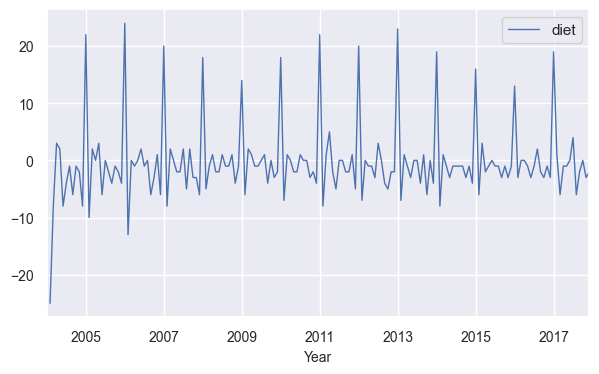

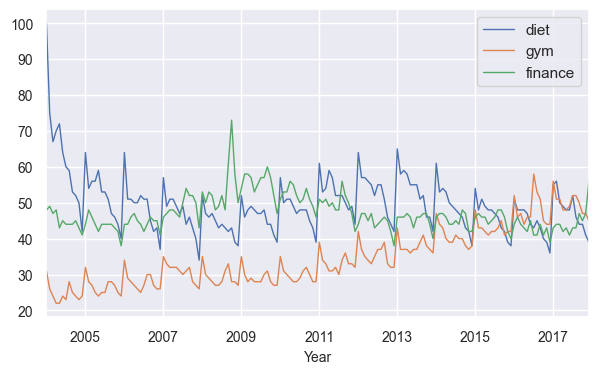

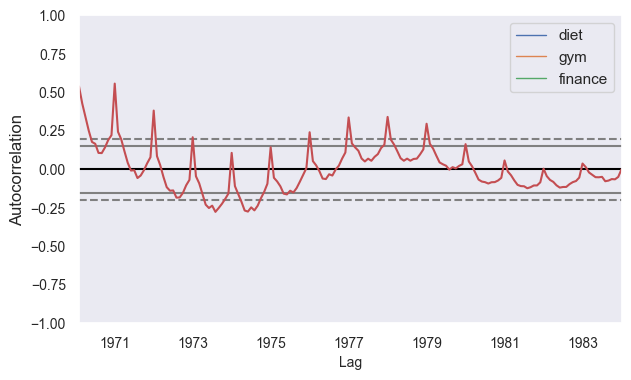

In [6]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.read_csv('D:\\AI\\10 القسم العاشر  مكتبة سايكيتليرن Sklearn Library\\Materials\Data\\4 Time Series\\multiTimeline.csv', skiprows=1)
df.head()
df.info()
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()
df.plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);
df[['diet']].plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);
diet.diff().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);
df.plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);
df.corr()
df.diff().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);
df.diff().corr()
pd.plotting.autocorrelation_plot(diet);

## 3- Example Three Using StatsModels

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg 
from statsmodels.tsa.arima_model import ARMA  
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# AR example
# contrived dataset
xdata = range(1, 100)
ydata = [x + (3*random()) for x in xdata]
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(xdata,ydata,s=10)
plt.show()
print()
# fit model
model = AutoReg(ydata)
model_fit = model.fit()
# make prediction
#yhat = model_fit.predict(len(xdata), len(ydata))
yhat = model_fit.predict( start= 90, end = 110 )
print('Predicted value for Auto Regression ', yhat)
#==========================================================
# MA example
# fit model
model = ARMA(ydata, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict( start= 90, end = 110 )
print('Predicted value for Moving Average 0,1 ',yhat)
#==========================================================
# ARMA example
newdata = [random() for x in range(1, 100)]
# change order
model = ARMA(newdata, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict( start= 90, end = 110 )
print('Predicted value for Moving Average 2,1 ',yhat)
#==========================================================
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict( start= 90, end = 110 )
print('Predicted value using SARIMAX ',yhat)
#==========================================================
# VAR example
# contrived dataset with dependency
data = []
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data    
# fit model
model = VAR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
print('Predicted value using VAR ',yhat)